# ---------------------** Zomato Data Analysis Project** -------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Zomato data.csv')

In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
# modify the 'rate' column data
def handle_rate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)


df['rate']=df['rate'].apply(handle_rate)

In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [ ]:
# check if missing value is present or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Question 1 - What type of restaurant do the majority of customers order from?


/tmp/ipython-input-49-1825616191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'], palette=c)


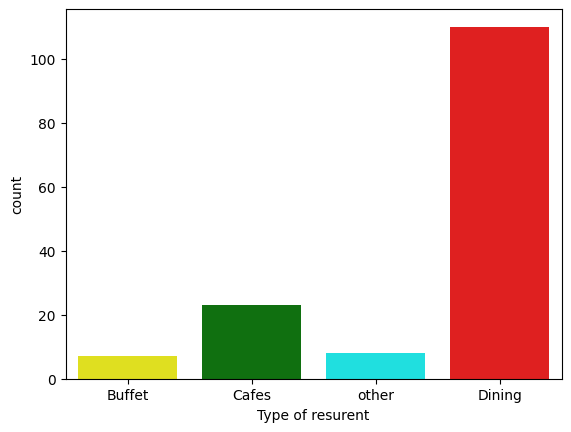

In [ ]:
# question 1

c=['yellow','green','aqua','red']
sns.countplot(x=df['listed_in(type)'], palette=c)
plt.xlabel('Type of resurent')
plt.show()

### conclusion -- majority of the resturent falls in dining catagory

# Question 2 -- How many votes has each type of restaurant received from customers?

In [ ]:
# question 2

grouped_data=df.groupby('listed_in(type)')['votes'].sum()
grouped_data

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


In [ ]:
result=pd.DataFrame({'votes':grouped_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


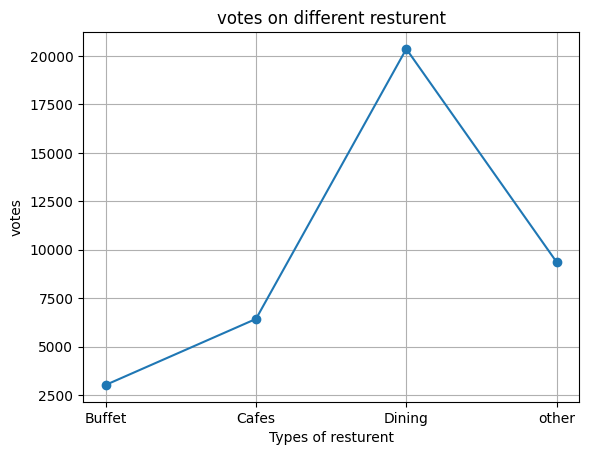

In [ ]:
plt.plot(result, marker='o')
plt.title('votes on different resturent')
plt.xlabel("Types of resturent")
plt.ylabel("votes")
plt.grid()
plt.show()

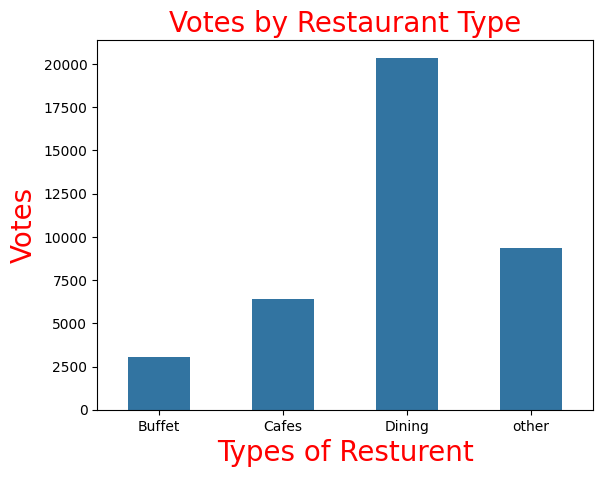

In [ ]:
# another process using bar plot
# prompt: how many vote has each type of resturent
# create bar plot

import matplotlib.pyplot as plt
sns.barplot(x=result.index, y=result['votes'],width=0.5)
plt.xlabel('Types of Resturent',color='red', size=20)
plt.ylabel('Votes', color='red',size=20)
plt.title('Votes by Restaurant Type', color='red', size=20)
plt.show()

### conclusion -- The dining type resturent receves the maximum vote

# Question 3 -- What are the ratings that the majority of restaurants have received?

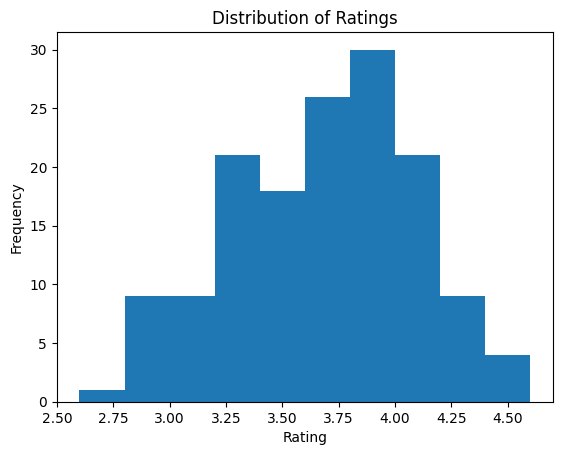

In [ ]:
# question 3

plt.hist(df.rate, bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

### conclusion -- The majority of ratings belongs to 3.5 to 4.0 for each resturent

# Question 4 -- Zomato has observed that most couples order most of their food online. What is their average spending on each order?


In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
# question 4

order_online=df[df['online_order'] == 'Yes']
sum=0
count=0
for i in order_online['approx_cost(for two people)']:
  sum=sum+i
  count=count+1
avg=sum/count
avg

510.3448275862069

### conclusion -- Their avarage spending of each online order is 510.34

# Question 5 -- Which mode (online or offline) has received the maximum rating?

/tmp/ipython-input-112-2259327784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.online_order,y=df.rate, palette=['red','yellow'])


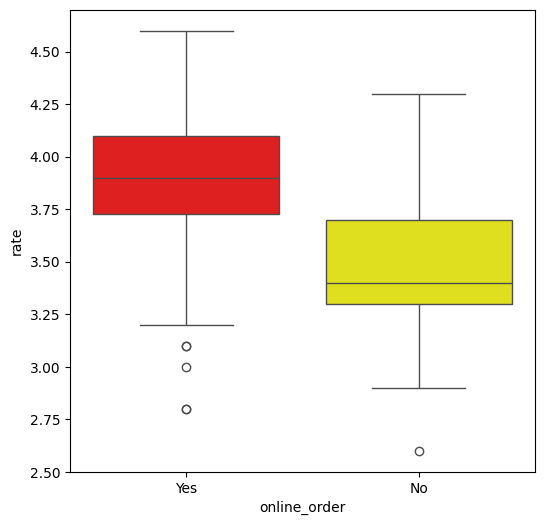

In [ ]:
# question 5
plt.figure(figsize=(6,6))
sns.boxplot(x=df.online_order,y=df.rate, palette=['red','yellow'])
plt.show()

### conclusion -- online orders have higher ratings than offline orders

# Question 6 -- Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
df1=df[['listed_in(type)','online_order']]
df1

,listed_in(type),online_order
0,Buffet,Yes
1,Buffet,Yes
2,Buffet,Yes
3,Buffet,No
4,Buffet,No
...,...,...
143,Dining,No
144,Dining,No
145,Dining,Yes
146,Dining,No


In [ ]:
offline=df1[df1['online_order']=='No']

In [ ]:
offline

,listed_in(type),online_order
3,Buffet,No
4,Buffet,No
6,Buffet,No
13,Cafes,No
18,Cafes,No
...,...,...
141,Dining,No
142,Dining,No
143,Dining,No
144,Dining,No


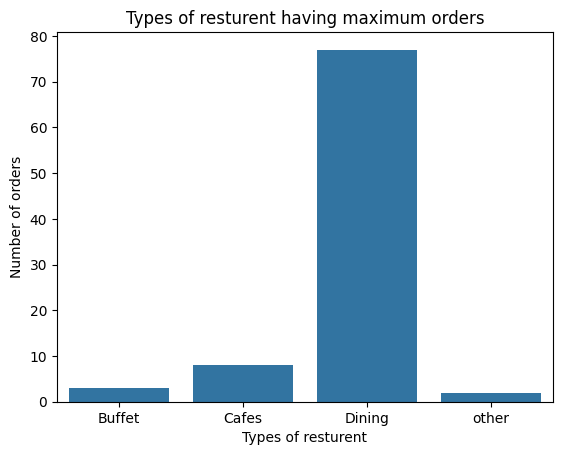

In [ ]:
sns.countplot(x=offline['listed_in(type)'])
plt.title('Types of resturent having maximum orders')
plt.xlabel('Types of resturent')
plt.ylabel('Number of orders')

plt.show()

### conclusion -- The dining type resturent receives the most offline orders